<a href="https://colab.research.google.com/github/krishchat/Honey-Production-Case-Study/blob/main/Honey_Production_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background: 

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insights into honey production supply and demand in America from 1998 to 2016.

# Objective: 

To visualize how honey production has changed over the years (1998-2016) in the United States. 


# Key questions to be answered:

1. How has honey production yield changed from 1998 to 2016?
2. Over time, what are the major production trends across the states?
3. Are there any patterns that can be observed between total honey production and the value of production every year? 
4. How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

state: Various states of the U.S.

year: Year of production

stocks: Refers to stocks held by producers. Unit is pounds

numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year

yieldpercol: Honey yield per colony. Unit is pounds

totalprod: Total production (numcol x yieldpercol). Unit is pounds

priceperlb: Refers to the average price per pound based on expanded sales. The unit is dollars.

prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.

Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, the summation of states will not equal the U.S. level value of production.


#Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading given dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/Honey Production Case Study/honeyproduction1998-2016.csv')

#Analyzing given dataset

In [4]:
df.head(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.shape, df.size, df.ndim

((785, 8), 6280, 2)

In [6]:
#Checking for Null values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        785 non-null    object 
 1   numcol       785 non-null    float64
 2   yieldpercol  785 non-null    int64  
 3   totalprod    785 non-null    float64
 4   stocks       785 non-null    float64
 5   priceperlb   785 non-null    float64
 6   prodvalue    785 non-null    float64
 7   year         785 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 49.2+ KB


In [7]:
# Checking Statistical measures of the dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

df.describe().T
# As the max value is very far away from median / 3rd quartile for many features, we can say there are many outliers in the data.


,count,mean,std,min,25%,50%,75%,max
numcol,785.00,61686.62,92748.94,2000.00,9000.00,26000.00,65000.00,510000.00
yieldpercol,785.00,60.58,19.43,19.00,46.00,58.00,72.00,136.00
totalprod,785.00,4140956.69,6884593.86,84000.00,470000.00,1500000.00,4096000.00,46410000.00
stocks,785.00,1257629.30,2211793.82,8000.00,119000.00,391000.00,1380000.00,13800000.00
priceperlb,785.00,1.70,0.93,0.49,1.05,1.48,2.04,7.09
prodvalue,785.00,5489738.85,9425393.88,162000.00,901000.00,2112000.00,5559000.00,83859000.00
year,785.00,2006.82,5.49,1998.00,2002.00,2007.00,2012.00,2016.00


# 1. How has honey production yield changed from 1998 to 2016?

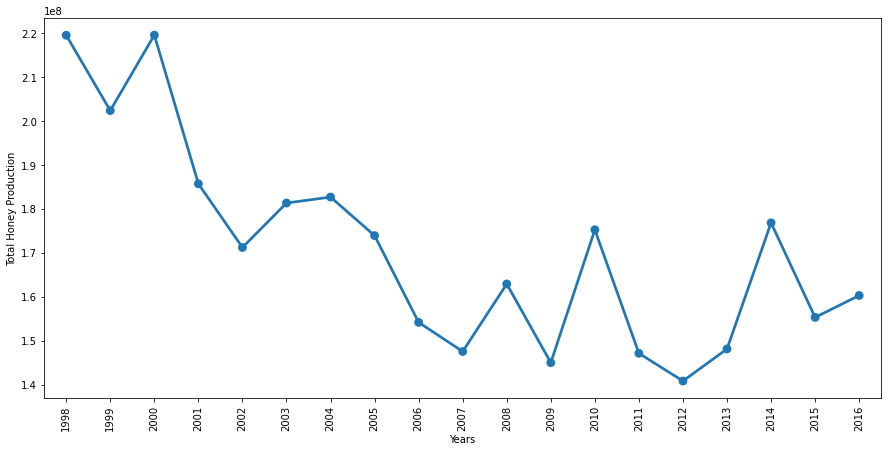

In [8]:
df.head()
df_prod_by_year = df.groupby(['year'])['totalprod'].sum().reset_index()

plt.figure(figsize=(15,7))
sns.pointplot(data=df_prod_by_year, x= 'year', y= 'totalprod');
plt.xticks(rotation= 90);
plt.xlabel('Years');
plt.ylabel('Total Honey Production');

Observations:

1.   Overall honey production is decreasing in the United States
2.   Total honey production = No. of Col X Avg. yield per Col
3.   Lets check if No. of Cols has decreased or yield has decreased or both

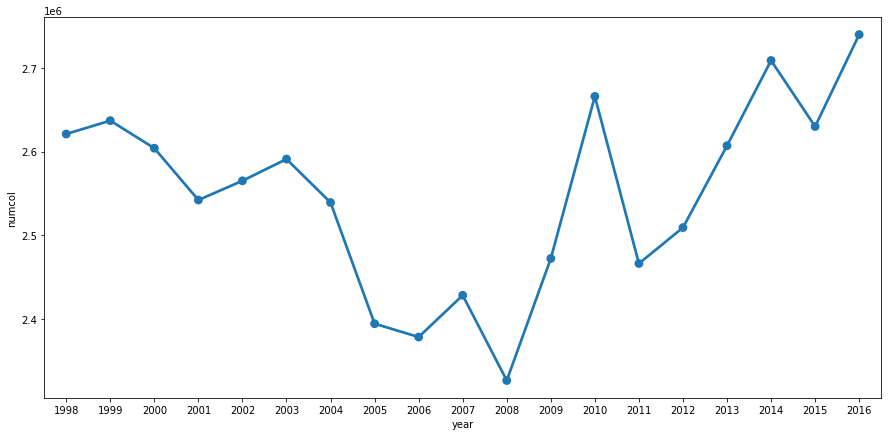

In [9]:
df.head()

df_numcols_by_year = df.groupby(['year'])['numcol'].sum().reset_index()

plt.figure(figsize= (15,7));
sns.pointplot(data = df_numcols_by_year, x= 'year', y= 'numcol');

No. of Colonies has INCREASED after 2008

In [10]:
df_numcols_by_year.sort_values(by='numcol', ascending = False).reset_index().drop(['index'], axis = 1)

,year,numcol
0,2016,2740000.00
1,2014,2709000.00
2,2010,2666000.00
3,1999,2637000.00
4,2015,2630000.00
5,1998,2621000.00
6,2013,2607000.00
7,2000,2604000.00
8,2003,2591000.00
9,2002,2565000.00


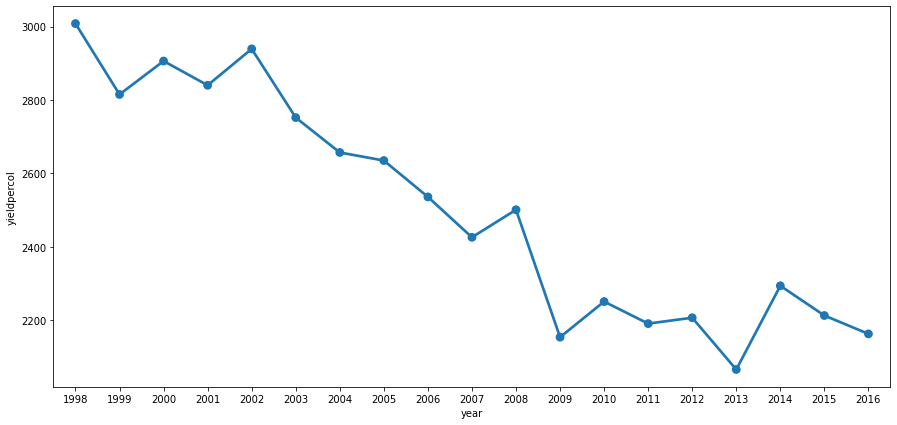

In [11]:
df_avg_prod_by_year = df.groupby(['year'])['yieldpercol'].sum().reset_index().sort_values(by='yieldpercol', ascending = False)

df_avg_prod_by_year

plt.figure(figsize = (15,7))
sns.pointplot(data = df_avg_prod_by_year, x= 'year', y='yieldpercol');

Observations:

1.   Overall honey production is decreasing in the United States
2.   Total honey production = No. of Col X Avg. yield per Col
3.   No. of Colonies has increased after 2008.
4.   But Yield Per Colony has decreased by almost 60%

# 2. Over time, what are the major production trends across the states?

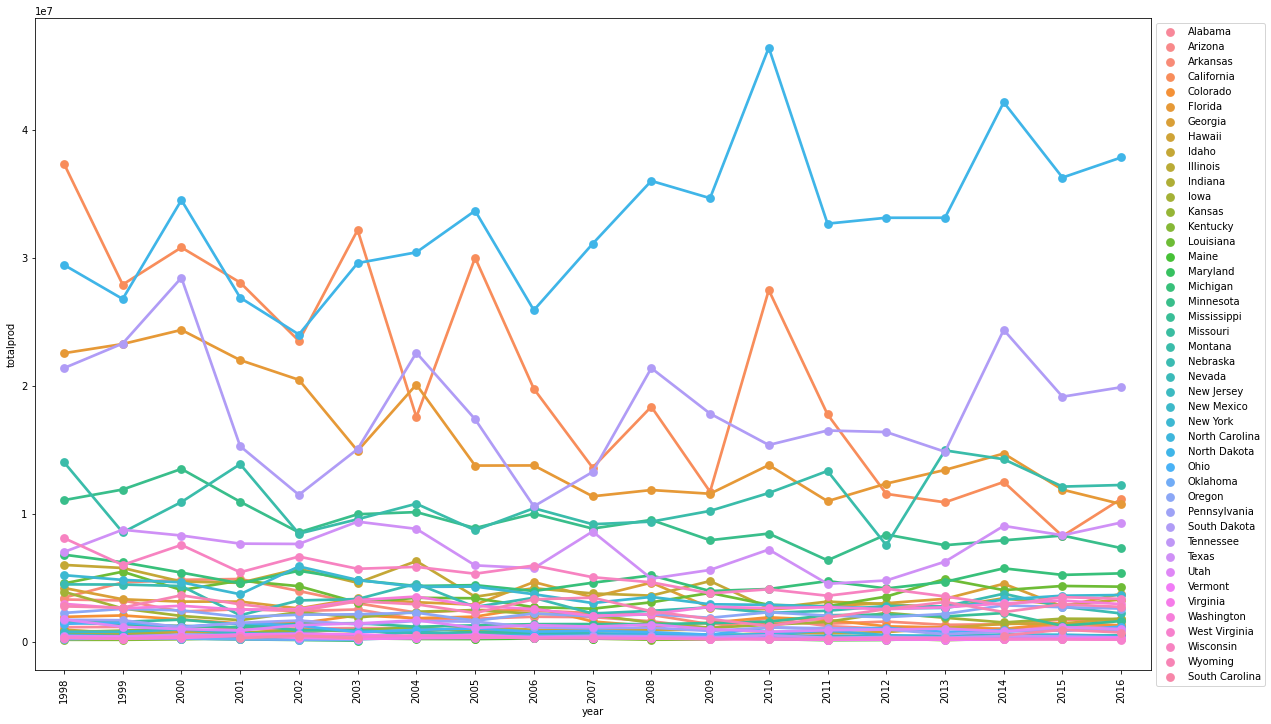

In [12]:
from matplotlib.patches import bbox_artist
from seaborn.categorical import pointplot
df.head()

plt.figure(figsize= (20,12));
sns,pointplot(data = df, x='year', y='totalprod', hue= 'state', estimator=sum);
plt.legend(bbox_to_anchor=(1, 1));
plt.xticks(rotation=90);


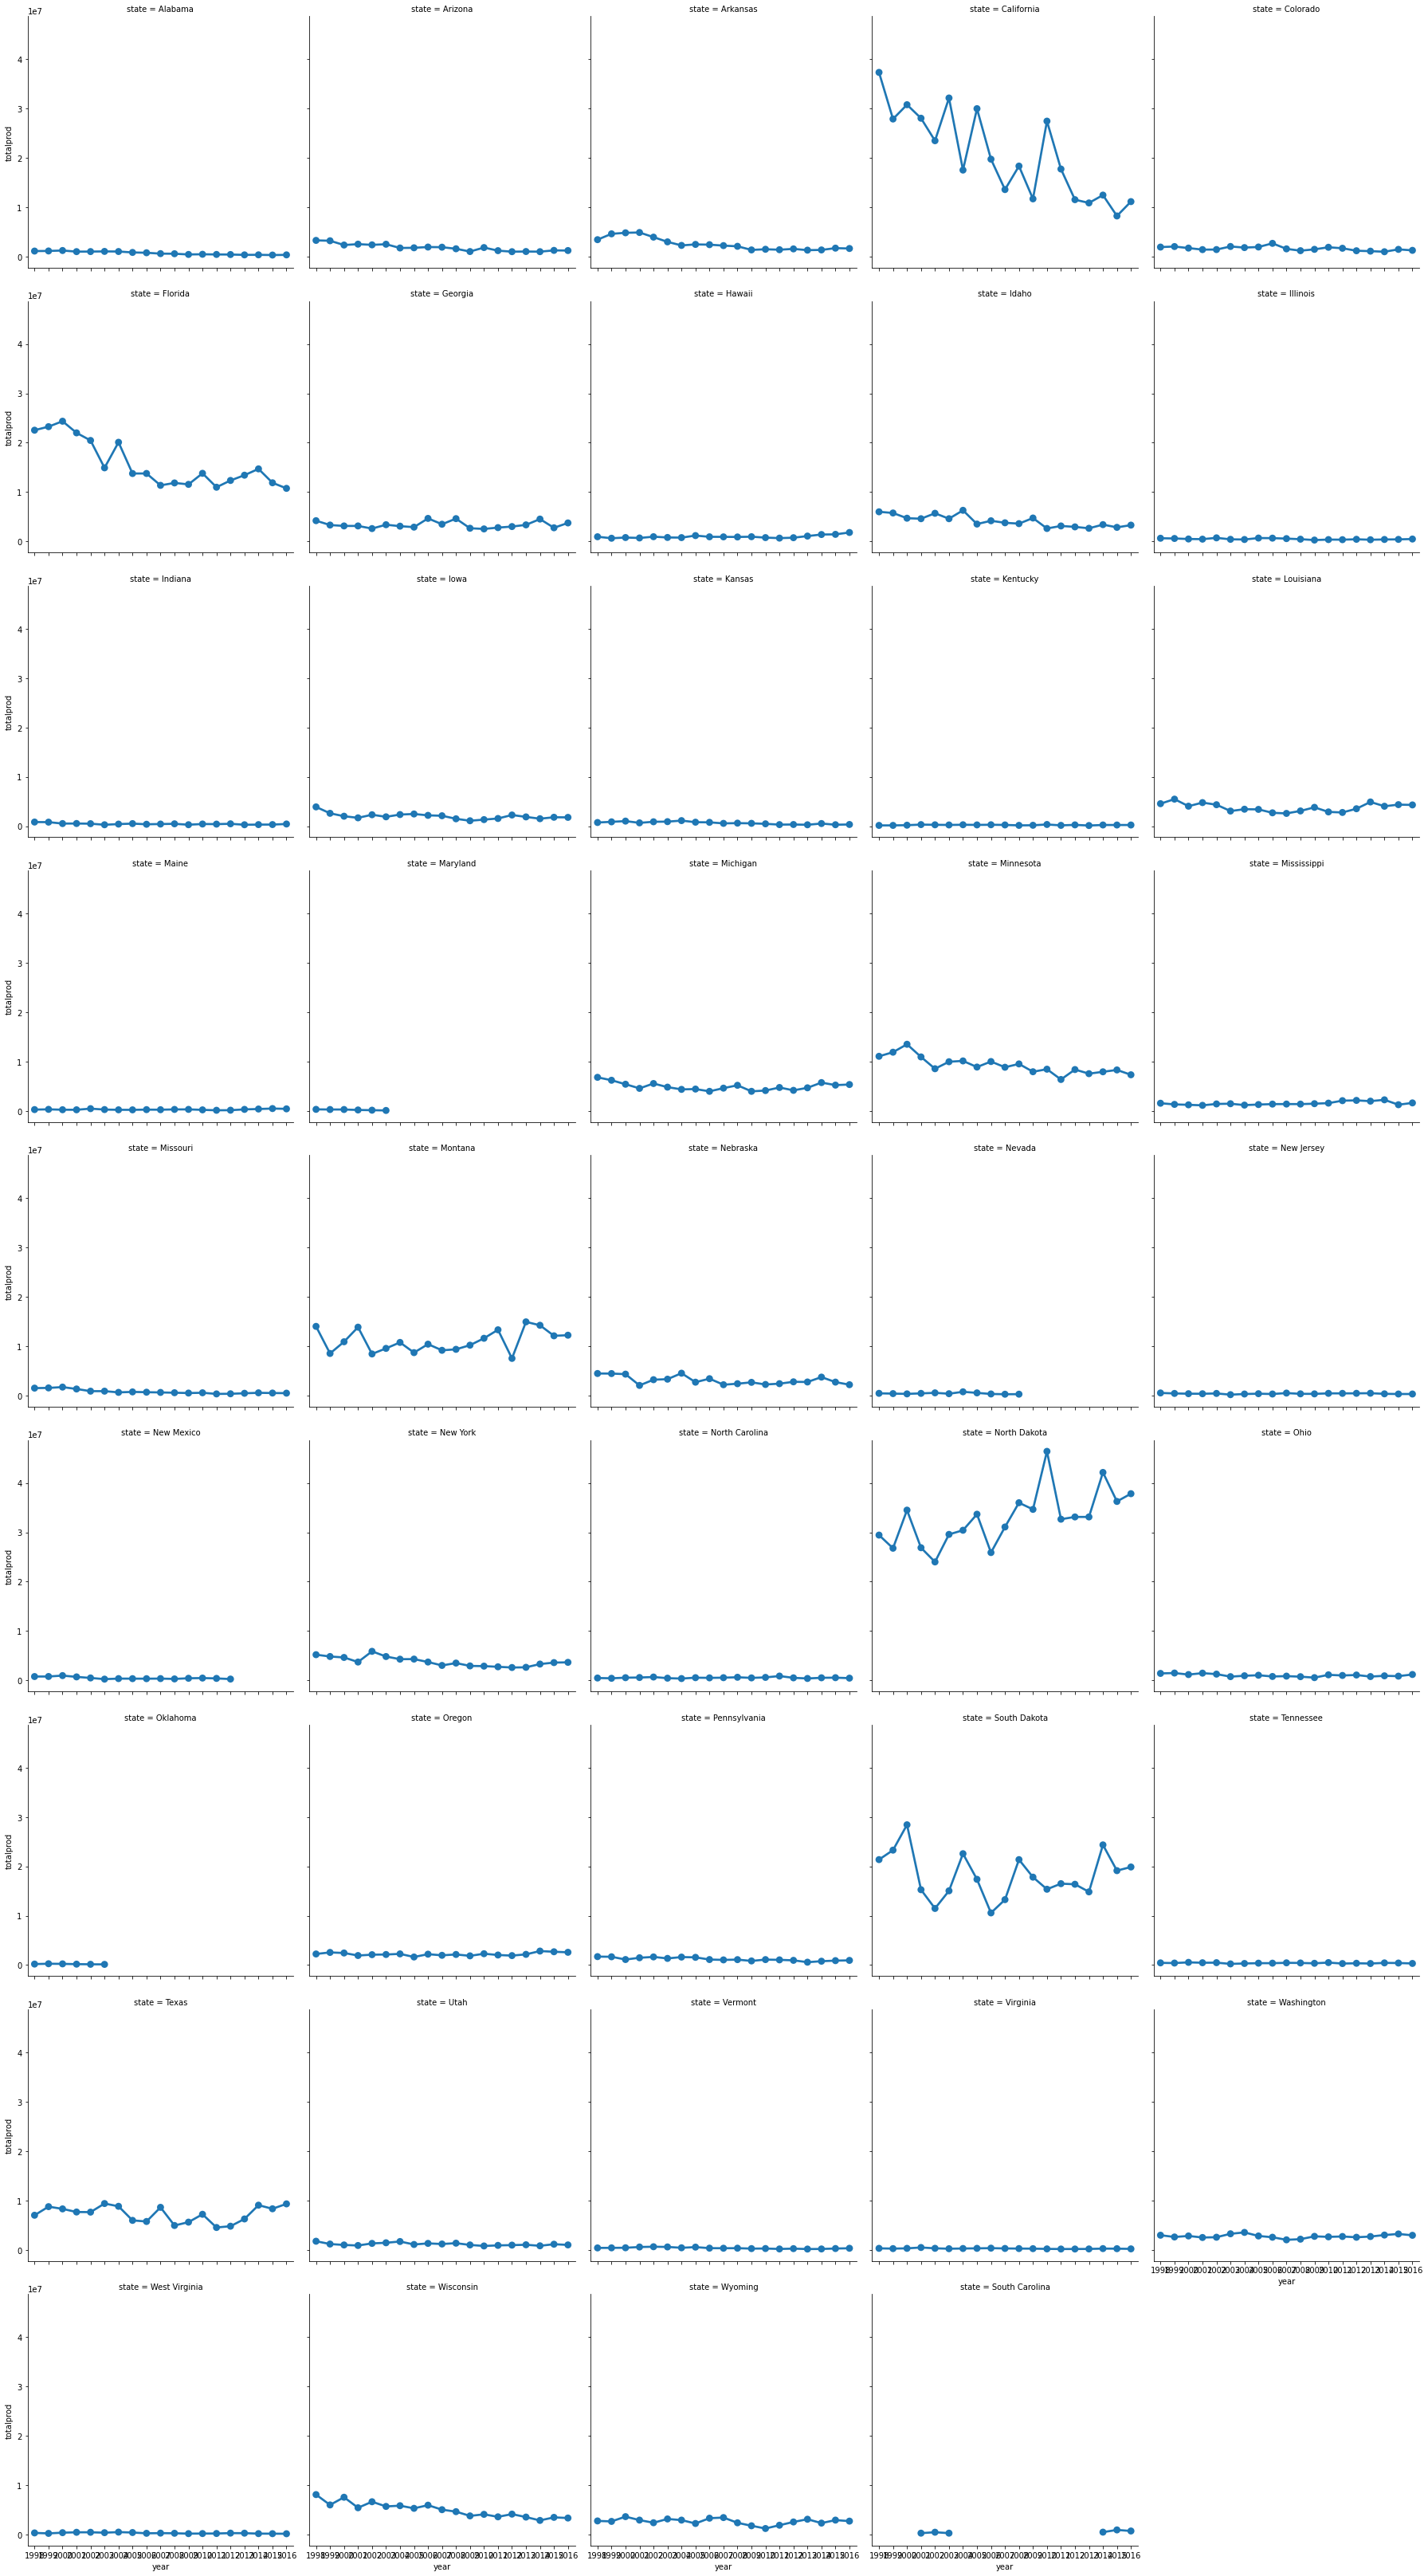

In [13]:
# As above plot is overlapping and hard to understand, lets try to plot each state separately ********** 

sns.catplot(data = df, x='year', y='totalprod', col='state', estimator=sum, kind='point', col_wrap=5)

Observations:

The most prominent honey-producing states of the US are - California, Florida, North Dakota and South Dakota and Montana.

Unfortunately, honey production in California has seen a steep decline over the years.

Florida's total production also has been on a decline.

South Dakota has more or less maintained its levels of production.

North Dakota has actually seen an impressive increase in the honey production.


# 3. Are there any patterns that can be observed between total honey production and the value of production every year?

<Figure size 1440x576 with 0 Axes>

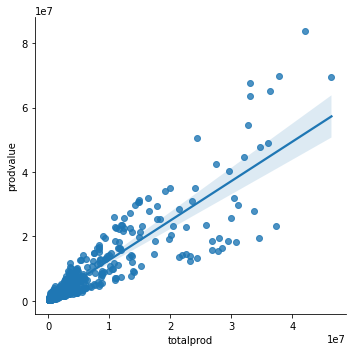

In [14]:
df.head()

plt.figure(figsize= (20,8));
sns.lmplot(data=df, x='totalprod', y='prodvalue');

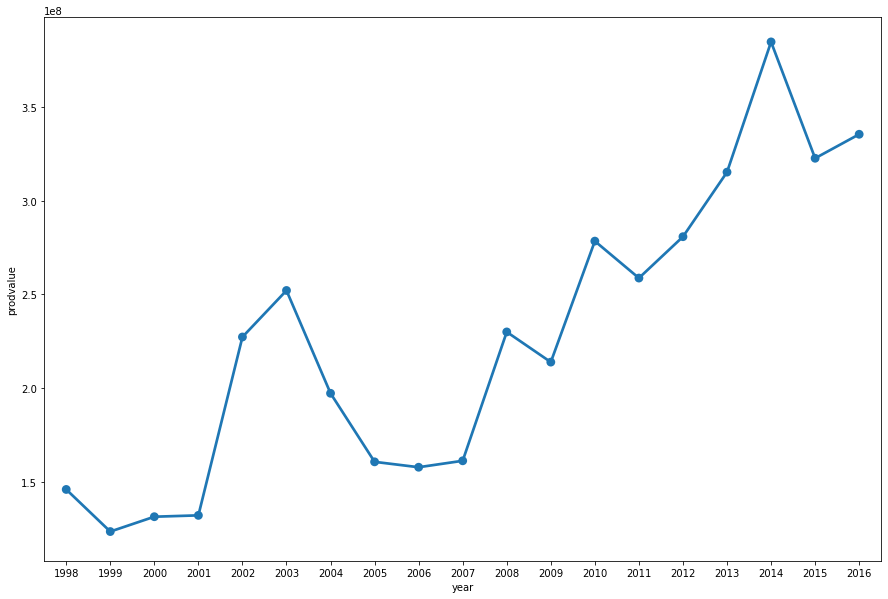

In [51]:
df.head()

plt.figure(figsize= (15, 10))
sns.pointplot(data=df, x= 'year', y='prodvalue', estimator = sum, ci=False);

Observations:

1.   Total Production & Production Value has a linear correlation. As the production increases, total value ($) of production also increases.
2.   With time, even though the total production has went down, the value of production increased.
3.    This means, the price / lb has gone up considerably over time.

Lets checkout the Price/lb changes over time

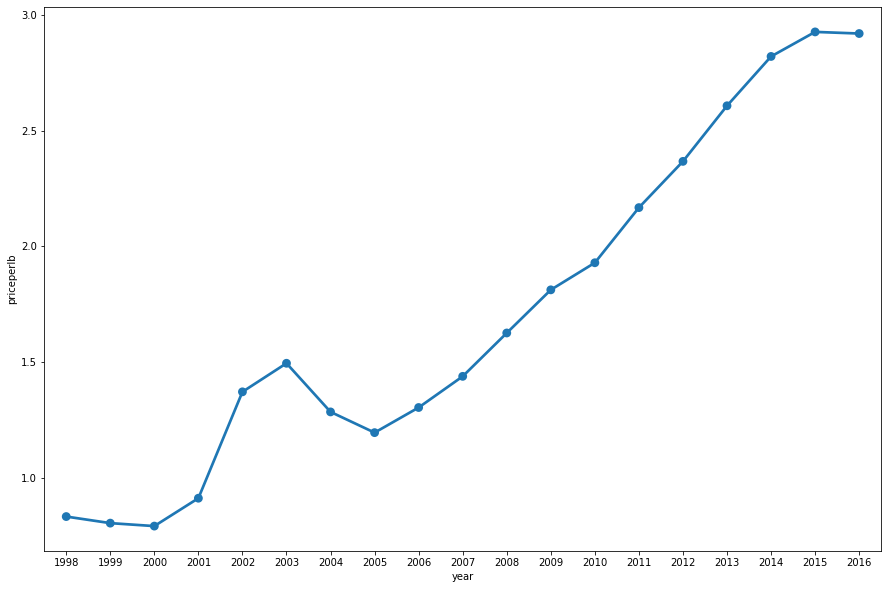

In [66]:
plt.figure(figsize= (15, 10))
sns.pointplot(data=df, x='year', y= 'priceperlb', estimator = np.mean, ci= None)

# 4.  How has value of production, which in some sense could be tied to demand, changed every year?

In [80]:
df.head()
df_consumed = df.groupby(['year']).agg({'stocks': 'sum', 'totalprod': 'sum', 'prodvalue': 'sum','priceperlb': 'mean' })
df_consumed['consumed'] = df_consumed['totalprod'] - df_consumed['stocks']

df_consumed

,stocks,totalprod,prodvalue,priceperlb,consumed
year,,,,,
1998,80565000.00,219519000.00,146091000.00,0.83,138954000.00
1999,78390000.00,202387000.00,123657000.00,0.80,123997000.00
2000,84956000.00,219558000.00,131568000.00,0.79,134602000.00
2001,64764000.00,185748000.00,132282000.00,0.91,120984000.00
2002,39177000.00,171265000.00,227302000.00,1.37,132088000.00
2003,40619000.00,181372000.00,252079000.00,1.49,140753000.00
2004,60981000.00,182729000.00,197307000.00,1.28,121748000.00
2005,62187000.00,173969000.00,160793000.00,1.20,111782000.00
2006,60235000.00,154238000.00,157924000.00,1.30,94003000.00


In [89]:
largecols = ['stocks','totalprod','prodvalue','consumed']

for cols in df_consumed.columns:
  if cols in largecols:
    df_consumed[cols] = round(df_consumed[cols] / 1000000, 2)


df_consumed

,stocks,totalprod,prodvalue,priceperlb,consumed
year,,,,,
1998,80.56,219.52,146.09,0.83,138.95
1999,78.39,202.39,123.66,0.80,124.00
2000,84.96,219.56,131.57,0.79,134.60
2001,64.76,185.75,132.28,0.91,120.98
2002,39.18,171.26,227.30,1.37,132.09
2003,40.62,181.37,252.08,1.49,140.75
2004,60.98,182.73,197.31,1.28,121.75
2005,62.19,173.97,160.79,1.20,111.78
2006,60.24,154.24,157.92,1.30,94.00


In [87]:
df_consumed.columns

Index(['stocks', 'totalprod', 'prodvalue', 'priceperlb', 'consumed'], dtype='object')

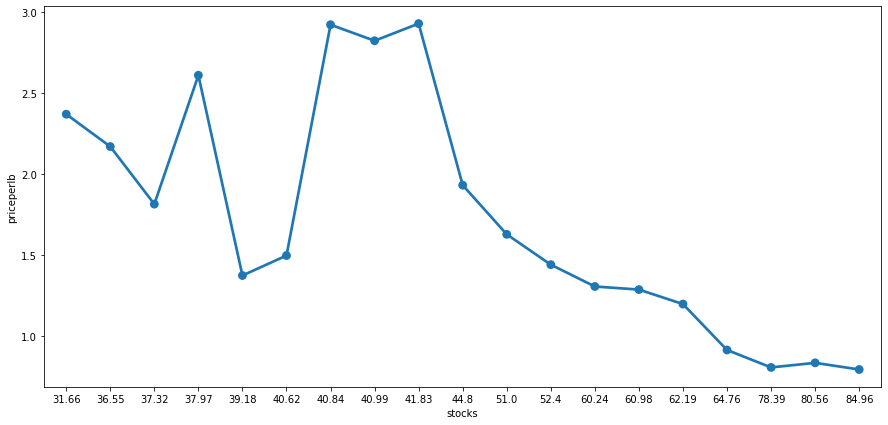

In [93]:
plt.figure(figsize=(15, 7));
sns.pointplot(data= df_consumed, x='stocks', y= 'priceperlb' );

##Observation

1. Price/Lb has decreased with increasing Stocks.
2. That means, whenever demand has decreased, stock has increased and price/lb has been decreased to encourge consumption.